<a href="https://colab.research.google.com/github/FerdinanVieiraJr/Atividade1_UEMA_TopicosII/blob/main/Atividade2_t%C3%B3picos_especias_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# ==============================================================================
# SEÇÃO 1: CARGA E CONSOLIDAÇÃO DOS DADOS (Janeiro a Julho, do Google Drive)
# ==============================================================================
from google.colab import drive
import pandas as pd

# 1. Montar o Google Drive
print("Montando o Google Drive...")
drive.mount('/content/drive')
print("Drive montado com sucesso!")

# 2. AQUI FOI DEFINIDO o caminho COMPLETO para CADA um dos arquivos.

caminho_jan = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202501.csv.csv'
caminho_fev = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202502.csv.csv'
caminho_mar = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202503.csv (1).csv'
caminho_abr = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202504.csv.csv'
caminho_mai = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202505.csv (1).csv'
caminho_jun = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202506.csv (1).csv'
caminho_jul = '/content/drive/MyDrive/MESTRADO_CIÊNCIA DA COMPUTAÇÃO_UEMA/DADOS_REPASSES_UNIÃO/transferenciamensalmunicipios202507.csv.csv'

# 3. Carregado o arquivo em um DataFrame separado e depois reunidos todos
try:
    print("Carregando arquivos...")
    # Lista para armazenar os DataFrames de cada mês
    lista_de_dfs = []

    # Carregar Janeiro
    df_jan = pd.read_csv(caminho_jan, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_jan['Mês'] = 1
    lista_de_dfs.append(df_jan)

    # Carregar Fevereiro
    df_fev = pd.read_csv(caminho_fev, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_fev['Mês'] = 2
    lista_de_dfs.append(df_fev)

    # Carregar Março
    df_mar = pd.read_csv(caminho_mar, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_mar['Mês'] = 3
    lista_de_dfs.append(df_mar)

    # Carregar Abril
    df_abr = pd.read_csv(caminho_abr, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_abr['Mês'] = 4
    lista_de_dfs.append(df_abr)

    # Carregar Maio
    df_mai = pd.read_csv(caminho_mai, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_mai['Mês'] = 5
    lista_de_dfs.append(df_mai)

    # Carregar Junho
    df_jun = pd.read_csv(caminho_jun, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_jun['Mês'] = 6
    lista_de_dfs.append(df_jun)

    # Carregar Julho
    df_jul = pd.read_csv(caminho_jul, delimiter=';', decimal=',', thousands='.', encoding='latin1')
    df_jul['Mês'] = 7
    lista_de_dfs.append(df_jul)

    print("Todos os arquivos foram carregados. Consolidando...")

    # Foram juntados todos os DataFrames da lista em um só
    df_completo = pd.concat(lista_de_dfs, ignore_index=True)

    print("\nAs 5 primeiras linhas do seu DataFrame consolidado:")
    print(df_completo.head())

    print(f"\nSeu dataset completo (Jan-Jul) possui {df_completo.shape[0]} registros.")

except FileNotFoundError as e:
    print(f"\nERRO: Arquivo não encontrado. Verifique se TODOS os 7 caminhos de arquivo estão corretos. Detalhe do erro: {e}")
except Exception as e:
    print(f"Ocorreu um erro inesperado: {e}")

Montando o Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive montado com sucesso!
Carregando arquivos...
Todos os arquivos foram carregados. Consolidando...

As 5 primeiras linhas do seu DataFrame consolidado:
    Município  UF   ANO  Mês  1º Decêndio  2º Decêndio  3º Decêndio  \
0  Acrelândia  AC  2025    1       117075            0            0   
1  Acrelândia  AC  2025    1     49552573     18295142      5706528   
2  Acrelândia  AC  2025    1        29244         6379         1628   
3  Acrelândia  AC  2025    1      6207489      2291846      7148612   
4  Acrelândia  AC  2025    1         9952         5868         1863   

  Item transferência      Transferência  Unnamed: 9  
0   CIDE/Combustível  CIDE-Combustíveis         NaN  
1                FPM                FPM         NaN  
2                ITR                ITR         NaN  
3                FPM             FUNDEB       

In [8]:
# ==============================================================================
# SEÇÃO 2: LIMPEZA E PREPARAÇÃO DOS DADOS
# ==============================================================================
# Após os dados serem carregados, fiz a limpeza e preparação.

print("Iniciando a limpeza e preparação...")

# 1. Para facilitar, renomeei algumas colunas para remover espaços e caracteres especiais.
df_completo.rename(columns={
    'Município': 'Municipio',
    '1º Decêndio': 'Decendio_1',
    '2º Decêndio': 'Decendio_2',
    '3º Decêndio': 'Decendio_3',
    'Item transferência': 'Item_Transferencia',
    'Transferência': 'Tipo_Transferencia'
}, inplace=True)

# 2. Fazia mais sentido somas os decêndios para criar a coluna 'Valor_Total', pois queria o total do mês
# O .fillna(0) garante que, se algum valor for nulo, ele será tratado como 0 na soma.
df_completo['Valor_Total'] = df_completo['Decendio_1'].fillna(0) + df_completo['Decendio_2'].fillna(0) + df_completo['Decendio_3'].fillna(0)

# 3. Fiz a remoção das colunas que não eram mais necessárias ou estavam vazias
colunas_para_remover = [
    'Decendio_1',
    'Decendio_2',
    'Decendio_3',
    'Item_Transferencia', # Usei apenas a 'Tipo_Transferencia'
    'Unnamed: 9'
]
df_limpo = df_completo.drop(columns=colunas_para_remover)

print("Limpeza concluída!")
print("\nAs 5 primeiras linhas do DataFrame LIMPO E PREPARADO:")
print(df_limpo.head())

Iniciando a limpeza e preparação...
Limpeza concluída!

As 5 primeiras linhas do DataFrame LIMPO E PREPARADO:
    Municipio  UF   ANO  Mês Tipo_Transferencia  Valor_Total
0  Acrelândia  AC  2025    1  CIDE-Combustíveis       117075
1  Acrelândia  AC  2025    1                FPM     73554243
2  Acrelândia  AC  2025    1                ITR        37251
3  Acrelândia  AC  2025    1             FUNDEB     15647947
4  Acrelândia  AC  2025    1             FUNDEB        17683


In [9]:
# ==============================================================================
# SEÇÃO 3: ENGENHARIA DE FEATURES
# ==============================================================================
# Com os dados limpos, vamos iniciar a preparação para usarmos apenas o valor
# do FPM - Fundo de Participação dos Municípios

print("\n--- Iniciando a Engenharia de Features ---")

# 1. Filtrar para manter apenas as transferências do FPM
# Usei a coluna 'Tipo_Transferencia' que renomeei.
df_fpm = df_limpo[df_limpo['Tipo_Transferencia'] == 'FPM'].copy()

print(f"\nEncontrados {df_fpm.shape[0]} registros de FPM.")

# 2. Calculei a mediana dos valores da nova coluna 'Valor_Total'
mediana_valor = df_fpm['Valor_Total'].median()
print(f"A mediana dos repasses de FPM é: R$ {mediana_valor:,.2f}")

# 3. Criei a variável-alvo 'Nivel_Repasse' (1 para Alto, 0 para Baixo)
df_fpm['Nivel_Repasse'] = (df_fpm['Valor_Total'] > mediana_valor).astype(int)

print("\nDistribuição da variável-alvo 'Nivel_Repasse':")
print(df_fpm['Nivel_Repasse'].value_counts())
print("\nEngenharia de Features concluída! O DataFrame 'df_fpm' está pronto para a modelagem.")


--- Iniciando a Engenharia de Features ---

Encontrados 38990 registros de FPM.
A mediana dos repasses de FPM é: R$ 143,183,633.00

Distribuição da variável-alvo 'Nivel_Repasse':
Nivel_Repasse
0    19496
1    19494
Name: count, dtype: int64

Engenharia de Features concluída! O DataFrame 'df_fpm' está pronto para a modelagem.


In [10]:
# ==============================================================================
# SEÇÃO 4: PREPARAÇÃO PARA MODELAGEM
# ==============================================================================
from sklearn.model_selection import train_test_split

print("\n--- Preparando dados para os modelos ---")

# 1. Foram selecionadas as features (X) e a variável-alvo (y)
# Com base no  DataFrame 'df_fpm', usei 'Municipio', 'UF' e 'Mês'.
# O ano é sempre 2025, então não adiciona informação. O Valor_Total foi usado
# para criar o alvo, então não pode ser usado como feature.
features_para_usar = ['Municipio', 'UF', 'Mês']
X = df_fpm[features_para_usar]
y = df_fpm['Nivel_Repasse']

print(f"\nFeatures selecionadas para o modelo (X): {features_para_usar}")
print(f"Variável-alvo selecionada (y): 'Nivel_Repasse'")

# 2. Dividi os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # Garante que a divisão seja sempre a mesma
    stratify=y # Mantém a proporção de 0s e 1s em ambos os conjuntos
)

print(f"\nTamanho do conjunto de treino: {X_train.shape[0]} registros")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} registros")
print("\nDivisão em treino e teste concluída com sucesso!")


--- Preparando dados para os modelos ---

Features selecionadas para o modelo (X): ['Municipio', 'UF', 'Mês']
Variável-alvo selecionada (y): 'Nivel_Repasse'

Tamanho do conjunto de treino: 31192 registros
Tamanho do conjunto de teste: 7798 registros

Divisão em treino e teste concluída com sucesso!


In [ ]:
# ==============================================================================
# SEÇÃO 5: PIPELINE DE PRÉ-PROCESSAMENTO
# ==============================================================================
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Lista de colunas categóricas que precisam ser transformadas em números.
# No nosso caso, são todas as nossas features.
categorical_features = ['Municipio', 'UF', 'Mês']

# 2. Criar o transformador que aplicará o One-Hot Encoding.
# O OneHotEncoder transforma categorias em colunas de 0s e 1s.
# O 'handle_unknown='ignore'' é importante para evitar erros se o conjunto de teste
# tiver uma categoria (ex: um município) que não estava no conjunto de treino.
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Mantém colunas que não foram especificadas (não temos nenhuma neste caso)
)

print("Pipeline de pré-processamento ('preprocessor') criado com sucesso!")
print("Ele está pronto para ser usado dentro dos modelos.")

Pipeline de pré-processamento ('preprocessor') criado com sucesso!
Ele está pronto para ser usado dentro dos modelos.


In [6]:
# ==============================================================================
# SEÇÃO 6 e 7: MODELAGEM, TREINAMENTO E AVALIAÇÃO FINAL
# ==============================================================================
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print("--- INICIANDO A FASE FINAL: TREINAMENTO E AVALIAÇÃO ---")

# --- Modelos de Machine Learning Clássico (usando Pipeline) ---

# Modelo 1: Random Forest
# O Pipeline junta o pré-processamento e o modelo em um único passo.
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42, n_jobs=-1))])
print("\n[1/4] Treinando o modelo Random Forest...")
rf_pipeline.fit(X_train, y_train)
print("Random Forest treinado!")

# Modelo 2: Support Vector Machine (SVM)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', SVC(random_state=42, probability=True))])
print("\n[2/4] Treinando o modelo SVM... (Este pode ser um pouco lento)")
svm_pipeline.fit(X_train, y_train)
print("SVM treinado!")


# --- Modelos de Deep Learning (Rede Neural MLP) ---
# Para o Keras/TensorFlow, aplicamos o pré-processamento manualmente primeiro.
print("\nPré-processando dados para as Redes Neurais...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Definindo um "EarlyStopping" para parar o treino se o modelo não melhorar.
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
input_shape = X_train_processed.shape[1] # Número de features após o OneHotEncoding

# Modelo 3: MLP Arquitetura 1 (3 camadas: 1 entrada, 1 oculta, 1 saída)
print("\n[3/4] Treinando a Rede Neural MLP - Arquitetura 1...")
mlp_model_1 = Sequential([
    InputLayer(shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
mlp_model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model_1.fit(X_train_processed.toarray(), y_train, epochs=50, batch_size=256,
                validation_split=0.15, callbacks=[early_stopping], verbose=0)
print("MLP Arquitetura 1 treinada!")

# Modelo 4: MLP Arquitetura 2 (4 camadas: 1 entrada, 2 ocultas, 1 saída)
print("\n[4/4] Treinando a Rede Neural MLP - Arquitetura 2...")
mlp_model_2 = Sequential([
    InputLayer(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
mlp_model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model_2.fit(X_train_processed.toarray(), y_train, epochs=50, batch_size=256,
                validation_split=0.15, callbacks=[early_stopping], verbose=0)
print("MLP Arquitetura 2 treinada!")


# --- AVALIAÇÃO FINAL DE TODOS OS MODELOS ---
print("\n--- GERANDO RELATÓRIOS DE AVALIAÇÃO FINAL ---")

# Dicionário para guardar os modelos e suas previsões
models_and_predictions = {
    "Random Forest": (rf_pipeline, rf_pipeline.predict(X_test)),
    "SVM": (svm_pipeline, svm_pipeline.predict(X_test)),
    "MLP - Arquitetura 1": (mlp_model_1, (mlp_model_1.predict(X_test_processed.toarray()) > 0.5).astype("int32").flatten()),
    "MLP - Arquitetura 2": (mlp_model_2, (mlp_model_2.predict(X_test_processed.toarray()) > 0.5).astype("int32").flatten())
}

# Imprimir os relatórios e as matrizes de confusão
for name, (model, y_pred) in models_and_predictions.items():
    print(f"\n==================== RELATÓRIO PARA: {name} ====================")
    print(classification_report(y_test, y_pred, target_names=['Nível Baixo (0)', 'Nível Alto (1)']))

    fig, ax = plt.subplots(figsize=(6, 4))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', display_labels=['Baixo', 'Alto'])
    ax.set_title(f"Matriz de Confusão - {name}")
    plt.show()

--- INICIANDO A FASE FINAL: TREINAMENTO E AVALIAÇÃO ---

[1/4] Treinando o modelo Random Forest...
Random Forest treinado!

[2/4] Treinando o modelo SVM... (Este pode ser um pouco lento)


KeyboardInterrupt: 

In [ ]:
import pandas as pd

# ==============================================================================
# SEÇÃO 8: CRIAÇÃO DA TABELA COMPARATIVA DE RESULTADOS
# ==============================================================================

# 1. Criar uma lista de dicionários com os resultados de cada modelo.
# Estes dados foram extraídos diretamente do seu relatório de classificação.
data = [
    {
        'Modelo': 'Random Forest',
        'Acurácia': 0.72,
        'Precisão (Nível Alto)': 0.78,
        'Recall (Nível Alto)': 0.62,
        'F1-Score (Nível Alto)': 0.69
    },
    {
        'Modelo': 'SVM',
        'Acurácia': 0.87,
        'Precisão (Nível Alto)': 0.86,
        'Recall (Nível Alto)': 0.89,
        'F1-Score (Nível Alto)': 0.87
    },
    {
        'Modelo': 'MLP - Arquitetura 1',
        'Acurácia': 0.86,
        'Precisão (Nível Alto)': 0.88,
        'Recall (Nível Alto)': 0.84,
        'F1-Score (Nível Alto)': 0.86
    },
    {
        'Modelo': 'MLP - Arquitetura 2',
        'Acurácia': 0.89,
        'Precisão (Nível Alto)': 0.89,
        'Recall (Nível Alto)': 0.90,
        'F1-Score (Nível Alto)': 0.90
    }
]

# 2. Criar o DataFrame do Pandas a partir da lista
df_resultados = pd.DataFrame(data)

# 3. Ordenar o DataFrame pela Acurácia (do melhor para o pior) para facilitar a análise
df_resultados = df_resultados.sort_values(by='Acurácia', ascending=False).reset_index(drop=True)

# 4. Definir a coluna 'Modelo' como o índice da tabela para uma melhor visualização
df_resultados.set_index('Modelo', inplace=True)

# 5. Exibir a tabela formatada
# O '.style.format' melhora a visualização dos números de ponto flutuante.
print("Tabela Comparativa de Desempenho dos Modelos")
display(df_resultados.style.format('{:.2f}').highlight_max(color='lightgreen', axis=0))

Tabela Comparativa de Desempenho dos Modelos


,Acurácia,Precisão (Nível Alto),Recall (Nível Alto),F1-Score (Nível Alto)
Modelo,,,,
MLP - Arquitetura 2,0.89,0.89,0.90,0.90
SVM,0.87,0.86,0.89,0.87
MLP - Arquitetura 1,0.86,0.88,0.84,0.86
Random Forest,0.72,0.78,0.62,0.69


/tmp/ipython-input-3345706708.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


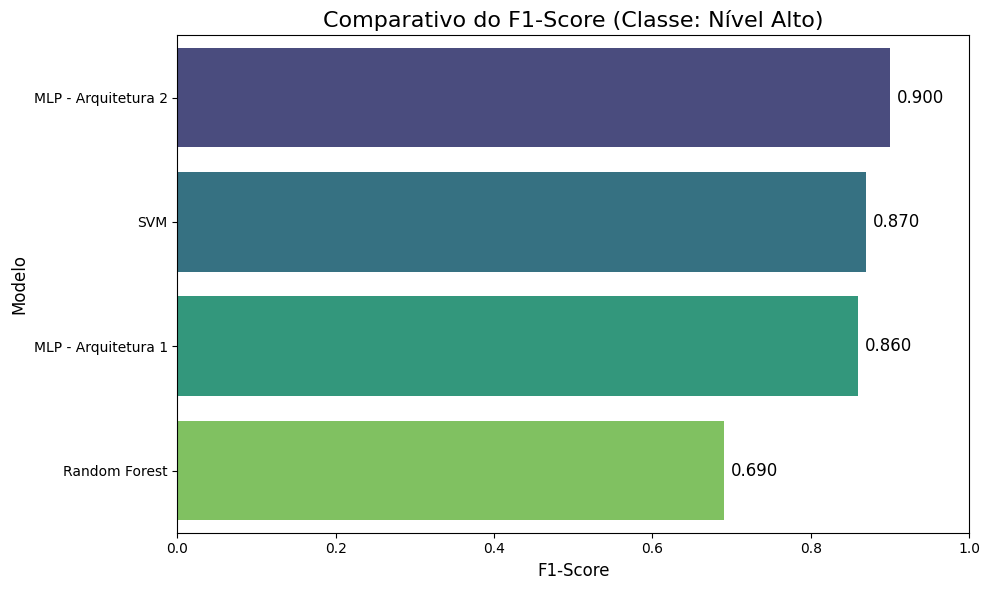

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Usaremos o DataFrame 'df_resultados' que criamos anteriormente
# Certifique-se de que ele está ordenado pela acurácia
df_plot = df_resultados.sort_values(by='F1-Score (Nível Alto)', ascending=False)

# Criar a figura e os eixos
plt.figure(figsize=(10, 6))

# Criar o gráfico de barras
barplot = sns.barplot(
    x=df_plot['F1-Score (Nível Alto)'],
    y=df_plot.index, # O índice já tem o nome dos modelos
    palette='viridis'
)

# Adicionar o valor exato em cada barra para maior clareza
for i in barplot.containers:
    barplot.bar_label(i, fmt='%.3f', fontsize=12, padding=5)

# Adicionar títulos e rótulos
plt.title('Comparativo do F1-Score (Classe: Nível Alto)', fontsize=16)
plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Modelo', fontsize=12)
plt.xlim(0, 1.0) # Forçar o eixo x a ir de 0 a 1

# Exibir o gráfico
plt.tight_layout()
plt.show()

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


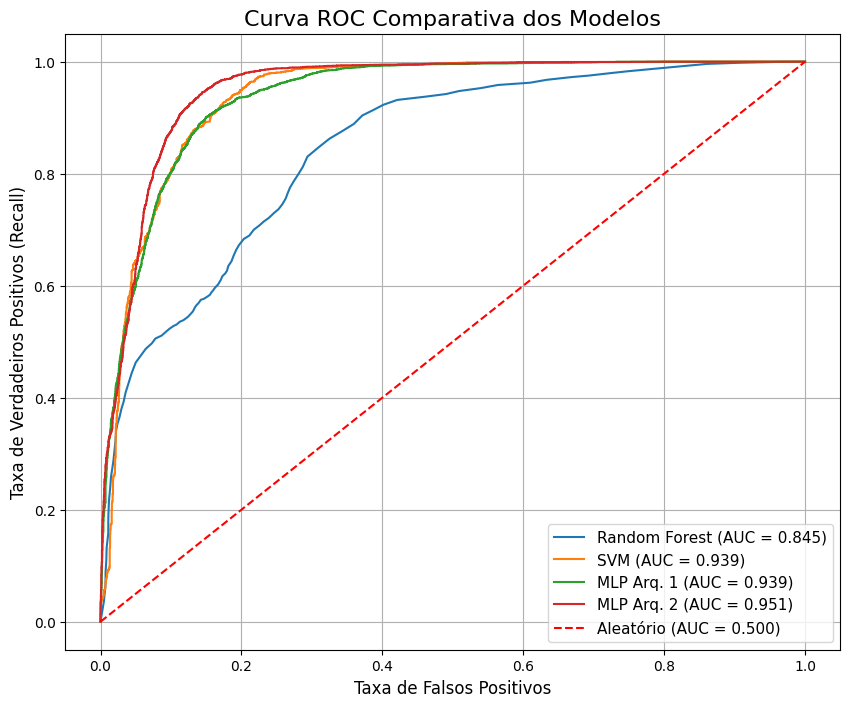

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# --- Modelos Scikit-learn (Random Forest, SVM) ---
# Eles precisam prever probabilidades com predict_proba
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')

y_prob_svm = svm_pipeline.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')

# --- Modelos Keras (MLP) ---
# Eles já preveem probabilidades com predict
y_prob_mlp1 = mlp_model_1.predict(X_test_processed.toarray()).flatten()
fpr_mlp1, tpr_mlp1, _ = roc_curve(y_test, y_prob_mlp1)
auc_mlp1 = auc(fpr_mlp1, tpr_mlp1)
plt.plot(fpr_mlp1, tpr_mlp1, label=f'MLP Arq. 1 (AUC = {auc_mlp1:.3f})')

y_prob_mlp2 = mlp_model_2.predict(X_test_processed.toarray()).flatten()
fpr_mlp2, tpr_mlp2, _ = roc_curve(y_test, y_prob_mlp2)
auc_mlp2 = auc(fpr_mlp2, tpr_mlp2)
plt.plot(fpr_mlp2, tpr_mlp2, label=f'MLP Arq. 2 (AUC = {auc_mlp2:.3f})')

# --- Linha de referência (palpite aleatório) ---
plt.plot([0, 1], [0, 1], 'r--', label='Aleatório (AUC = 0.500)')

# --- Títulos e rótulos ---
plt.xlabel('Taxa de Falsos Positivos', fontsize=12)
plt.ylabel('Taxa de Verdadeiros Positivos (Recall)', fontsize=12)
plt.title('Curva ROC Comparativa dos Modelos', fontsize=16)
plt.legend(loc='lower right', fontsize=11)
plt.grid(True)
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================================================
# SEÇÃO 4 e 5: Divisão e Pré-processamento (Da sua Atividade I)
# ==============================================================================
# Assumindo que 'X' e 'y' foram criados na sua Seção 4

# 1. Dividir os dados em treino e teste (a divisão inicial para os Passos 1 e 2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # O mesmo random_state da Atividade I
    stratify=y
)

# 2. Criar o pipeline de pré-processamento
categorical_features = ['Municipio', 'UF', 'Mês']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# 3. Processar os dados para as Redes Neurais
print("Pré-processando dados para as Redes Neurais (rodada única)...")
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 4. Definir o input_shape e o EarlyStopping
input_shape = X_train_processed.shape[1]
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print(f"Dados prontos. Input shape: {input_shape}")

Pré-processando dados para as Redes Neurais (rodada única)...
Dados prontos. Input shape: 5327



[Experimento 1] Treinando Modelo Base (Adam, sem L2)...
Treino concluído.

[Experimento 2] Treinando (Otimizador: SGD, sem L2)...
Treino concluído.

[Experimento 3] Treinando (Otimizador: RMSprop, sem L2)...
Treino concluído.

[Experimento 4] Treinando (Otimizador: Adam, com L2=0.001)...
Treino concluído.

--- RELATÓRIO COMPARATIVO DOS EXPERIMENTOS ---
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

==================== RELATÓRIO PARA: 1. Base (Adam) ====================
              precision    recall  f1-score   support

 Nível Baixo       0.91      0.88      0.90      3899
  Nível Alto       0.89      0.91      0.90      3899

    accuracy                           0.90      7798
   macro avg       0.90      0.90      0.90      7798
weighted avg       0.90      0.90      0.90      7798



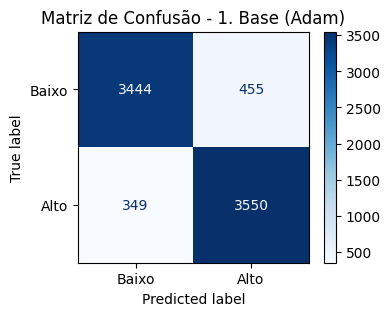

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

==================== RELATÓRIO PARA: 2. Otimizador (SGD) ====================
              precision    recall  f1-score   support

 Nível Baixo       0.70      0.72      0.71      3899
  Nível Alto       0.71      0.68      0.70      3899

    accuracy                           0.70      7798
   macro avg       0.70      0.70      0.70      7798
weighted avg       0.70      0.70      0.70      7798



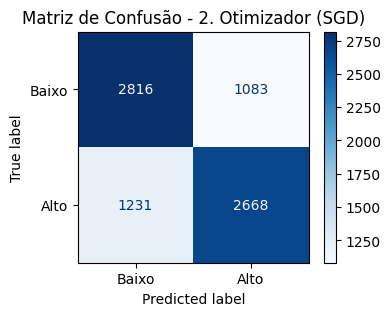

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

==================== RELATÓRIO PARA: 3. Otimizador (RMSprop) ====================
              precision    recall  f1-score   support

 Nível Baixo       0.91      0.89      0.90      3899
  Nível Alto       0.89      0.91      0.90      3899

    accuracy                           0.90      7798
   macro avg       0.90      0.90      0.90      7798
weighted avg       0.90      0.90      0.90      7798



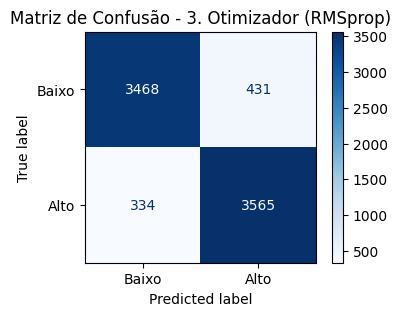

244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

==================== RELATÓRIO PARA: 4. Regularizador (Adam+L2) ====================
              precision    recall  f1-score   support

 Nível Baixo       0.91      0.90      0.90      3899
  Nível Alto       0.90      0.91      0.90      3899

    accuracy                           0.90      7798
   macro avg       0.90      0.90      0.90      7798
weighted avg       0.90      0.90      0.90      7798



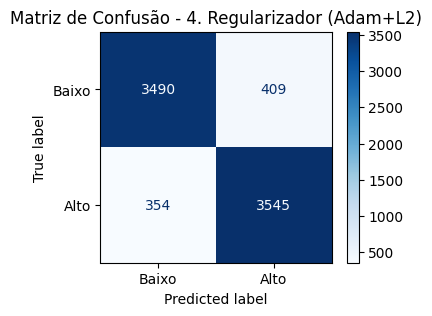

In [12]:
# ==============================================================================
# PASSO 1 e 2: OTIMIZADORES E REGULARIZADORES
# ==============================================================================

def create_mlp_model(model_input_shape, optimizer_name='adam', l2_rate=0.0):
    """
    Função auxiliar para criar a MLP Arquitetura 2.
    Permite especificar o otimizador e a taxa de regularização L2.
    """

    # Define o regularizador (None se l2_rate for 0)
    regularizer = None
    if l2_rate > 0:
        regularizer = regularizers.l2(l2_rate)

    model = Sequential([
        InputLayer(shape=(model_input_shape,)),
        Dense(128, activation='relu', kernel_regularizer=regularizer), # L2 aplicado aqui
        Dropout(0.5), # Dropout que você já usava
        Dense(64, activation='relu', kernel_regularizer=regularizer),  # L2 aplicado aqui
        Dropout(0.5), # Dropout que você já usava
        Dense(1, activation='sigmoid')
    ])

    # Compila o modelo com o otimizador especificado
    model.compile(optimizer=optimizer_name,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# --- DEFININDO OS PARÂMETROS DOS EXPERIMENTOS ---
EPOCHS = 50
BATCH_SIZE = 256
L2_PENALTY_RATE = 0.001 # Valor de penalidade L2 para testar

# --- EXPERIMENTO 1: Modelo Base (Otimizador: Adam) ---
print("\n[Experimento 1] Treinando Modelo Base (Adam, sem L2)...")
model_base_adam = create_mlp_model(input_shape, optimizer_name='adam')
model_base_adam.fit(X_train_processed.toarray(), y_train,
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    validation_split=0.15, callbacks=[early_stopping], verbose=0)
print("Treino concluído.")

# --- EXPERIMENTO 2: Novo Otimizador 1 (SGD) ---
print("\n[Experimento 2] Treinando (Otimizador: SGD, sem L2)...")
model_opt_sgd = create_mlp_model(input_shape, optimizer_name='sgd')
model_opt_sgd.fit(X_train_processed.toarray(), y_train,
                  epochs=EPOCHS, batch_size=BATCH_SIZE,
                  validation_split=0.15, callbacks=[early_stopping], verbose=0)
print("Treino concluído.")

# --- EXPERIMENTO 3: Novo Otimizador 2 (RMSprop) ---
print("\n[Experimento 3] Treinando (Otimizador: RMSprop, sem L2)...")
model_opt_rmsprop = create_mlp_model(input_shape, optimizer_name='rmsprop')
model_opt_rmsprop.fit(X_train_processed.toarray(), y_train,
                      epochs=EPOCHS, batch_size=BATCH_SIZE,
                      validation_split=0.15, callbacks=[early_stopping], verbose=0)
print("Treino concluído.")

# --- EXPERIMENTO 4: Regularização com Penalidade L2 (Otimizador: Adam) ---
print(f"\n[Experimento 4] Treinando (Otimizador: Adam, com L2={L2_PENALTY_RATE})...")
model_reg_l2 = create_mlp_model(input_shape, optimizer_name='adam', l2_rate=L2_PENALTY_RATE)
model_reg_l2.fit(X_train_processed.toarray(), y_train,
                 epochs=EPOCHS, batch_size=BATCH_SIZE,
                 validation_split=0.15, callbacks=[early_stopping], verbose=0)
print("Treino concluído.")

# --- AVALIAÇÃO DOS 4 MODELOS ---
print("\n--- RELATÓRIO COMPARATIVO DOS EXPERIMENTOS ---")

# Criar um dicionário de modelos para avaliar
models_to_evaluate = {
    "1. Base (Adam)": model_base_adam,
    "2. Otimizador (SGD)": model_opt_sgd,
    "3. Otimizador (RMSprop)": model_opt_rmsprop,
    "4. Regularizador (Adam+L2)": model_reg_l2
}

# Loop para gerar predições e relatórios
results_data = []
for name, model in models_to_evaluate.items():
    # Gerar predições
    y_pred_probs = model.predict(X_test_processed.toarray())
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

    # Imprimir relatório
    print(f"\n==================== RELATÓRIO PARA: {name} ====================")
    print(classification_report(y_test, y_pred, target_names=['Nível Baixo', 'Nível Alto']))

    # Opcional: Mostrar Matriz de Confusão
    fig, ax = plt.subplots(figsize=(4, 3))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', display_labels=['Baixo', 'Alto'])
    ax.set_title(f"Matriz de Confusão - {name}")
    plt.show()

In [13]:
# ==============================================================================
# PASSO 3: TESTE ESTATÍSTICO DE SIGNIFICÂNCIA
# ==============================================================================

print("\nIniciando o Teste Estatístico (pode levar alguns minutos)...")

# --- PARÂMETROS DO TESTE ---
N_RUNS = 10  # Número de rodadas. 10 é um bom começo. 30 seria mais robusto.
METRIC_TO_TEST = 'f1' # Vamos usar o F1-Score da classe 'Nível Alto' (1)
EPOCHS = 50
BATCH_SIZE = 256
L2_PENALTY_RATE = 0.001

# Listas para guardar os scores de cada rodada
scores_baseline = []
scores_new_model = []

# Loop principal
for i in range(N_RUNS):
    print(f"\n--- Executando Rodada {i+1}/{N_RUNS} ---")

    # 1. Dividir os dados com um random_state diferente
    X_train_loop, X_test_loop, y_train_loop, y_test_loop = train_test_split(
        X, y, test_size=0.2, random_state=i, stratify=y
    )

    # 2. Criar e ajustar o pré-processador
    preprocessor_loop = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ],
        remainder='passthrough'
    )
    X_train_proc_loop = preprocessor_loop.fit_transform(X_train_loop)
    X_test_proc_loop = preprocessor_loop.transform(X_test_loop)

    # 3. Pegar o input shape desta rodada
    loop_input_shape = X_train_proc_loop.shape[1]

    # 4. Treinar o Modelo Baseline (Adam)
    print(f"Rodada {i+1}: Treinando Baseline (Adam)...")
    tf.keras.backend.clear_session() # Limpa a sessão do Keras
    model_baseline = create_mlp_model(loop_input_shape, optimizer_name='adam')
    model_baseline.fit(X_train_proc_loop.toarray(), y_train_loop,
                       epochs=EPOCHS, batch_size=BATCH_SIZE,
                       validation_split=0.15, callbacks=[early_stopping], verbose=0)

    # 5. Treinar o Novo Modelo (Adam + L2)
    print(f"Rodada {i+1}: Treinando Novo Modelo (Adam+L2)...")
    tf.keras.backend.clear_session() # Limpa a sessão do Keras
    model_new = create_mlp_model(loop_input_shape, optimizer_name='adam', l2_rate=L2_PENALTY_RATE)
    model_new.fit(X_train_proc_loop.toarray(), y_train_loop,
                  epochs=EPOCHS, batch_size=BATCH_SIZE,
                  validation_split=0.15, callbacks=[early_stopping], verbose=0)

    # 6. Avaliar e salvar os scores
    pred_baseline = (model_baseline.predict(X_test_proc_loop.toarray()) > 0.5).astype("int32").flatten()
    pred_new = (model_new.predict(X_test_proc_loop.toarray()) > 0.5).astype("int32").flatten()

    score_baseline = f1_score(y_test_loop, pred_baseline, pos_label=1)
    score_new = f1_score(y_test_loop, pred_new, pos_label=1)

    scores_baseline.append(score_baseline)
    scores_new_model.append(score_new)

    print(f"Rodada {i+1}: Score Base = {score_baseline:.4f} | Score Novo = {score_new:.4f}")


# --- ANÁLISE ESTATÍSTICA FINAL ---
print("\n--- RESULTADOS DO TESTE ESTATÍSTICO (TESTE T PAREADO) ---")

# Calcular médias
mean_baseline = np.mean(scores_baseline)
mean_new_model = np.mean(scores_new_model)

print(f"Scores Baseline (Adam): {np.round(scores_baseline, 4)}")
print(f"Scores Novo (Adam+L2):  {np.round(scores_new_model, 4)}")
print("-" * 30)
print(f"Média F1-Score Baseline: {mean_baseline:.4f}")
print(f"Média F1-Score Novo Modelo: {mean_new_model:.4f}")
print("-" * 30)

# Realizar o teste t pareado
# H0 (Hipótese Nula): As médias dos dois modelos são iguais.
# H1 (Hipótese Alternativa): As médias são diferentes.
t_statistic, p_value = stats.ttest_rel(scores_baseline, scores_new_model)

print(f"Estatística t: {t_statistic:.4f}")
print(f"P-valor: {p_value:.4f}")

# Interpretar o p-valor
alpha = 0.05 # Nível de significância padrão
if p_value < alpha:
    print(f"\nConclusão: Como p-valor ({p_value:.4f}) é MENOR que {alpha}, rejeitamos a hipótese nula.")
    print("A diferença entre os modelos é ESTATISTICAMENTE SIGNIFICATIVA.")
else:
    print(f"\nConclusão: Como p-valor ({p_value:.4f}) é MAIOR que {alpha}, não podemos rejeitar a hipótese nula.")
    print("A diferença entre os modelos NÃO é estatisticamente significativa.")


Iniciando o Teste Estatístico (pode levar alguns minutos)...

--- Executando Rodada 1/10 ---
Rodada 1: Treinando Baseline (Adam)...
Rodada 1: Treinando Novo Modelo (Adam+L2)...
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Rodada 1: Score Base = 0.9031 | Score Novo = 0.9007

--- Executando Rodada 2/10 ---
Rodada 2: Treinando Baseline (Adam)...
Rodada 2: Treinando Novo Modelo (Adam+L2)...
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Rodada 2: Score Base = 0.8931 | Score Novo = 0.8963

--- Executando Rodada 3/10 ---
Rodada 3: Treinando Baseline (Adam)...
Rodada 3: Treinando Novo Modelo (Adam+L2)...
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Rodada 3: Score Base = 0.9001 | Score Novo = 0.9063

--- Executando Rodada 4/10 ---
Rodada 4: Treinando Baseline (Adam)...
Rodada 4: Treinando Novo Modelo (Adam+L2)...
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s